## Situação Descritiva :

### Nos últimos anos, serviços de música por streaming tem-se tornado os principais meios pelos quais as pessoas ouvem e curtem as suas músicas favoritas. Isso se deve à popularização do smartphone, redução dos preços dos planos dos aplicativos de música, grande quantidade de aplicativos do gênero e planos de internet cada vez mais acessíveis e mais rápidos. Cada vez mais os prestadores de serviço do gênero ampliam suas bases de dados, oferecendo à seus clientes quantidades e variedades cada vez maiores de músicas e vídeos. Se por um lado essa é uma grande vantagem competitiva, por outro é um grande desafio para as empresas no que tange a oferecer e recomendar seus produtos à seus clientes, pois recomendações que o desagradem podem fazer com que ele até cancele sua assinatura, vindo a procurar melhores serviços em outro fornecedor de streaming. Por essa razão, serviços de streaming tem procurado meios de categorizar suas músicas no intuito de fornecer recomendações personalizadas a cada um de seus clientes. Devido aos inúmeros gêneros e sub-gêneros de cada categoria, se ater a apenas recomendar baseado no gênero não é uma boa estratégia. Uma maneira de se efetuar uma recomendação razoavelmente personalizada é aquela baseada na análise das informações intrínsecas do áudio, subdivididas em diversas métricas.

In [1]:
# Impressão dos gráficos no proprio notebook

%matplotlib inline


# Importação das bilbiotecas básicas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
sns.set()


# Futuros estilos usados para os Gráficos
# plt.style.use("dark_background")
# plt.style.use("default")



# Inibição dos avisos de Warning

import warnings
warnings.filterwarnings('ignore')


# Importação das bibliotecas de Machine Learning

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


# from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

RANDOM_STATE = 42
PREDICTS_ALL = {}
RESULTS_ALL = {}

In [2]:
# Leitura dos metadados das faixas contendo os rotulos de generos musicais
tracks = pd.read_csv('fma-rock-vs-hiphop.csv')

# Leitura das métricas das faixas contendo os atributos
echonest_metrics = pd.read_json('echonest-metrics.json', precise_float=True)

In [3]:
tracks.head()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


In [4]:
echonest_metrics.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


In [5]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17734 entries, 0 to 17733
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   track_id       17734 non-null  int64 
 1   bit_rate       17734 non-null  int64 
 2   comments       17734 non-null  int64 
 3   composer       166 non-null    object
 4   date_created   17734 non-null  object
 5   date_recorded  1898 non-null   object
 6   duration       17734 non-null  int64 
 7   favorites      17734 non-null  int64 
 8   genre_top      17734 non-null  object
 9   genres         17734 non-null  object
 10  genres_all     17734 non-null  object
 11  information    482 non-null    object
 12  interest       17734 non-null  int64 
 13  language_code  4089 non-null   object
 14  license        17714 non-null  object
 15  listens        17734 non-null  int64 
 16  lyricist       53 non-null     object
 17  number         17734 non-null  int64 
 18  publisher      52 non-null

In [6]:
echonest_metrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 0 to 13128
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          13129 non-null  int64  
 1   acousticness      13129 non-null  float64
 2   danceability      13129 non-null  float64
 3   energy            13129 non-null  float64
 4   instrumentalness  13129 non-null  float64
 5   liveness          13129 non-null  float64
 6   speechiness       13129 non-null  float64
 7   tempo             13129 non-null  float64
 8   valence           13129 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [7]:
tracks.describe()

,track_id,bit_rate,comments,duration,favorites,interest,listens,number
count,17734.000000,17734.000000,17734.000000,17734.000000,17734.000000,1.773400e+04,17734.000000,17734.000000
mean,69394.145991,258971.413781,0.020695,220.942934,1.685237,1.678238e+03,1079.709541,6.184110
std,45784.589753,61535.621463,0.270070,177.906821,6.629402,9.394969e+03,4693.497635,7.075062
min,2.000000,-1.000000,0.000000,2.000000,0.000000,1.800000e+01,9.000000,0.000000
25%,29979.000000,220982.000000,0.000000,139.000000,0.000000,4.210000e+02,214.000000,2.000000
50%,64193.500000,256000.000000,0.000000,192.000000,1.000000,8.240000e+02,461.000000,5.000000
75%,109442.750000,320000.000000,0.000000,255.000000,2.000000,1.628000e+03,1018.000000,8.000000
max,155319.000000,448000.000000,24.000000,3675.000000,554.000000,1.038669e+06,433992.000000,100.000000


In [8]:
echonest_metrics.describe()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
count,13129.000000,1.312900e+04,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000
mean,34031.058268,5.246876e-01,0.487290,0.537516,0.640536,0.187804,0.099174,123.080061,0.439761
std,28950.422182,3.837186e-01,0.190148,0.278049,0.361430,0.158051,0.137381,35.015137,0.276028
min,2.000000,9.035000e-07,0.051307,0.000020,0.000000,0.025297,0.022324,12.753000,0.000010
25%,12986.000000,1.037726e-01,0.344759,0.321300,0.323466,0.101406,0.036932,95.967000,0.197321
50%,28097.000000,5.739848e-01,0.485635,0.549113,0.838134,0.119002,0.049019,120.057000,0.417743
75%,45021.000000,9.207270e-01,0.629094,0.776254,0.918244,0.211041,0.085452,145.318000,0.665575
max,124911.000000,9.957965e-01,0.968645,0.999964,0.998016,0.980330,0.966177,251.072000,0.999990


In [9]:
# Intervalo temporal das musicas presentes no dataset.
# Essa informacao pode ser relevante em determinadas situacoes para ser possivel verificar tendencias


print(f"O dataset possuí músicas produzidas entre {tracks['date_created'].min()[0:4]} e {tracks['date_created'].max()[0:4]}.")

O dataset possuí músicas produzidas entre 2008 e 2017.


In [10]:
# Uniao das colunas relevantes do dataset de metadados e do dataset de metricas
# Utilizado o metodo inner-join para essa tarefa

echo_tracks = echonest_metrics.merge(tracks[['genre_top', 'track_id']], on='track_id')


In [11]:
echo_tracks

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,1.062807e-02,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,1.851103e-03,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,5,0.043567,0.745566,0.701470,6.967990e-04,0.373143,0.124595,100.260,0.621661,Hip-Hop
3,134,0.452217,0.513238,0.560410,1.944269e-02,0.096567,0.525519,114.290,0.894072,Hip-Hop
4,153,0.988306,0.255661,0.979774,9.730057e-01,0.121342,0.051740,90.241,0.034018,Rock
...,...,...,...,...,...,...,...,...,...,...
4797,124718,0.412194,0.686825,0.849309,6.000000e-10,0.867543,0.367315,96.104,0.692414,Hip-Hop
4798,124719,0.054973,0.617535,0.728567,7.215700e-06,0.131438,0.243130,96.262,0.399720,Hip-Hop
4799,124720,0.010478,0.652483,0.657498,7.098000e-07,0.701523,0.229174,94.885,0.432240,Hip-Hop
4800,124721,0.067906,0.432421,0.764508,1.625500e-06,0.104412,0.310553,171.329,0.580087,Hip-Hop


In [12]:
print(f'O dataset emotion_tracks tem {echo_tracks.shape[0]} Linhas e {echo_tracks.shape[1]} Colunas.')

O dataset emotion_tracks tem 4802 Linhas e 10 Colunas.


In [13]:
echo_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   acousticness      4802 non-null   float64
 2   danceability      4802 non-null   float64
 3   energy            4802 non-null   float64
 4   instrumentalness  4802 non-null   float64
 5   liveness          4802 non-null   float64
 6   speechiness       4802 non-null   float64
 7   tempo             4802 non-null   float64
 8   valence           4802 non-null   float64
 9   genre_top         4802 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 412.7+ KB


In [14]:
echo_tracks.describe()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
count,4802.000000,4.802000e+03,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000
mean,30164.871720,4.870600e-01,0.436556,0.625126,0.604096,0.187997,0.104877,126.687944,0.453413
std,28592.013796,3.681396e-01,0.183502,0.244051,0.376487,0.150562,0.145934,34.002473,0.266632
min,2.000000,9.491000e-07,0.051307,0.000279,0.000000,0.025297,0.023234,29.093000,0.014392
25%,7494.250000,8.351236e-02,0.296047,0.450757,0.164972,0.104052,0.036897,98.000750,0.224617
50%,20723.500000,5.156888e-01,0.419447,0.648374,0.808752,0.123080,0.049594,124.625500,0.446240
75%,44240.750000,8.555765e-01,0.565339,0.837016,0.915472,0.215151,0.088290,151.450000,0.666914
max,124722.000000,9.957965e-01,0.961871,0.999768,0.993134,0.971392,0.966177,250.059000,0.983649


In [15]:
print(f"O DataSet possui {sum(echo_tracks.duplicated('track_id'))} Músicas Duplicadas.")

O DataSet possui 0 Músicas Duplicadas.


In [16]:
echo_tracks['genre_top'].unique()

array(['Hip-Hop', 'Rock'], dtype=object)

In [17]:
print(f"O DataSet possui {echo_tracks[echo_tracks['genre_top'] == 'Rock'].count()['genre_top']} musicas classificadas como sendo do genero ROCK.")
print(f"O DataSet possui {echo_tracks[echo_tracks['genre_top'] == 'Hip-Hop'].count()['genre_top']} musicas classificadas como sendo do genero HIP-HOP.\n\n")

O DataSet possui 3892 musicas classificadas como sendo do genero ROCK.
O DataSet possui 910 musicas classificadas como sendo do genero HIP-HOP.




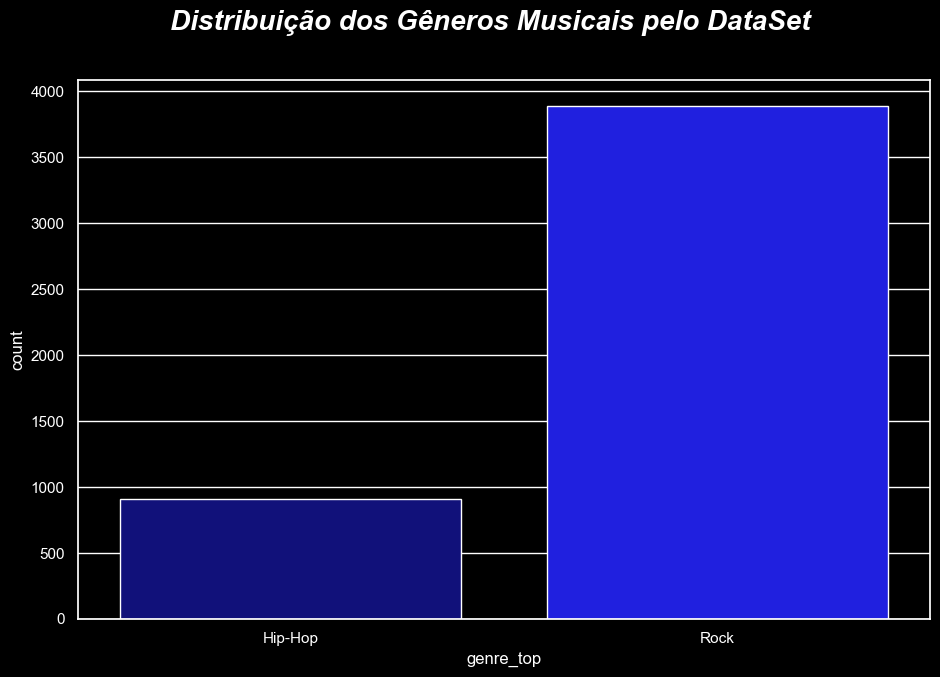

In [34]:
plt.style.use('dark_background')

color1 = sns.color=('darkblue','blue')


fig = plt.figure(figsize=(11,7))
plt.suptitle('Distribuição dos Gêneros Musicais pelo DataSet', fontsize=20, fontweight='bold', style='italic')
sns.countplot(x=echo_tracks['genre_top'], palette=(color1), edgecolor='white')
plt.show();

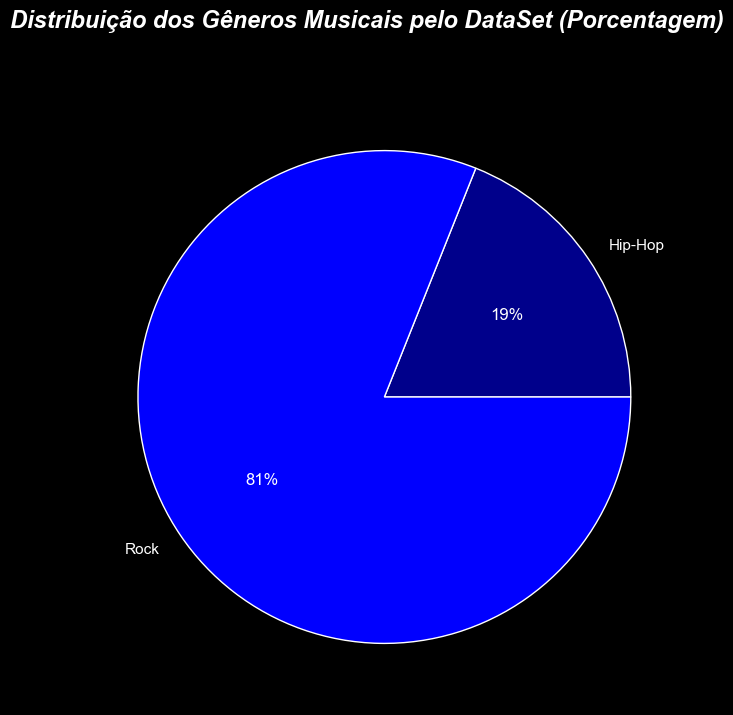

In [19]:
genero_da_musica = ['Hip-Hop', 'Rock']
quantidade_de_musica = ['910', '3892']


plt.style.use('dark_background')
color1 = sns.color=('darkblue','blue')


fig = plt.figure(figsize=(14,8))
plt.suptitle('Distribuição dos Gêneros Musicais pelo DataSet (Porcentagem)', fontsize=17, fontweight='bold', style='italic')
plt.pie(quantidade_de_musica, labels=genero_da_musica, colors=(color1), autopct='%.0f%%')
plt.show(); 

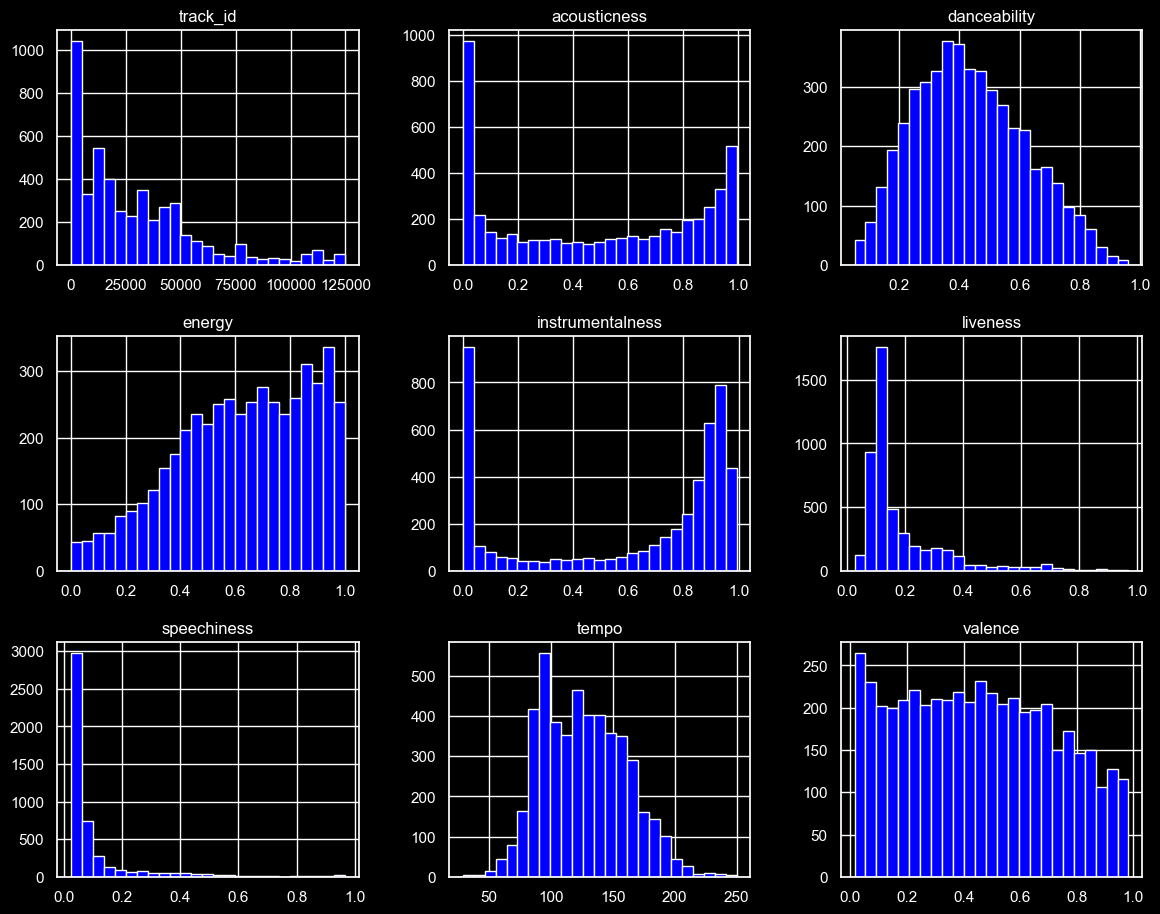

In [20]:
echo_tracks.hist(bins=25, figsize=(14,11), color='blue', edgecolor='white')
plt.show()

# 

In [21]:
# Subset de atributos
X = echo_tracks.drop(['genre_top', 'track_id'], axis=1).values

# Subset de rotulos
y = echo_tracks['genre_top'].values

# Divisao em subsets de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE, train_size=0.7, stratify=y)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'\nX_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (3361, 8)
y_train shape: (3361,)

X_test shape: (1441, 8)
y_test shape: (1441,)


In [22]:
print(f'Set de TREINO: {np.unique(y_train, return_counts=True)}')
print(f'Set de TESTE: {np.unique(y_test, return_counts=True)}')

Set de TREINO: (array(['Hip-Hop', 'Rock'], dtype=object), array([ 637, 2724], dtype=int64))
Set de TESTE: (array(['Hip-Hop', 'Rock'], dtype=object), array([ 273, 1168], dtype=int64))


# IMPORTANTE!!!

##  Normalização dos dados de atributos

### O valores de amplitude de cada categoria de atributo variam muito entre si. Por exemplo: a feature tempo possui como valor mínimo o valor de 29, enquanto a feature acousticness possui o valor de 9.49e-07 (praticamente 0). Esse fato pode enviesar o algoritmo ao atribuir pesos maiores aos maiores valores dos atributos. Assim, será feita a normalização dos dados, mantendo-se a média em 0 e o desvio-padrão em 1, técnica chamada de z-Score.

### O treinamento do transformador StandardScaler() deve ser realizado apenas nas instâncias de treino, enquanto a transformação deve ser realizada nas instâncias de treino e de teste.

In [23]:
scaler = StandardScaler()

# Normalizando os atributos dos dados de treino e teste.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
classifier = {}
classifier = {'knn':'kNN', 'lr':'Logistic Regression', 'svm':'SVM', 'dt':'Decision Trees', 'rf':'Random Forest'}

def build_classifiers():
    """
    Retorna uma lista com os classificadores que serão avaliados.
    """
    classifiers = []
    classifiers.append(
                      ('knn',                              # nome do classificador
                        KNeighborsClassifier(),            # instancia do classificador
                        {'n_neighbors' : range(1, 33, 2)}  # hiperparametros
                      )
    )

    classifiers.append(
                      ('lr',
                        LogisticRegression(max_iter=1000),
                        {'penalty' : ['l2'],
                         'C' : [100, 10, 1, 0.1, 0.01]
                        }
                      )
    )
    
    classifiers.append(
                      ('svm',
                        SVC(),
                        {'kernel' : ['linear', 'rbf'], 
                         'C' : [2 ** (-5), 1, 2 ** 5, 2 ** 10],
                         'gamma' : [2 ** (-15), 2 ** (-10), 2 ** (-5), 1, 2 ** 5]
                        }
                      )
    )
    
    classifiers.append(
                      ('dt',
                        DecisionTreeClassifier(),
                        {'max_depth' : [2, 4, 6, 8, 10, 12]}
                      )  
    )
    
    classifiers.append(
                      ('rf',
                        RandomForestClassifier(),
                        {'n_estimators' : [10, 50, 100]}
                      ) 
    )
    return classifiers

In [25]:
def print_conf_matrix(y_test, y_predicted, text):
    fig = plt.figure(figsize=(18,10))
    fig.suptitle(f'{text}\n\n', fontsize=18, fontweight='bold', style='italic')
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.85, wspace=0.3, hspace=0.5)

    for i in range(len(predicts)):
        plt.subplot(2, 3, i+1)
        plt.title(f'Matriz de Confusão do classificador\n{classifier[classifiers[i][0]]}', style='italic')
        sns.heatmap(confusion_matrix(y_test, predicts[i]), square=True, annot=True, fmt='d', cbar=False, linewidths=0.3, cmap='PuBu', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

    plt.show()

In [26]:
def metric(y_test, y_predicted):
    for i in range(len(predicts)):
        print(f'\n\nMetricas para o classificador: {classifier[classifiers[i][0]].upper()}')
        print(classification_report(y_test, predicts[i]))

In [27]:
def print_result_box(names, results, text):
    fig, ax = plt.subplots(figsize=(8,6))
    fig.suptitle(f'{text}', fontsize=18, fontweight='bold', style='italic')
    plt.boxplot(results)
    ax.set_xticklabels(names)
    ax.set_xlabel('Classificadores')
    ax.set_ylabel('Acuracia')
    return plt.show()


----------------------------------------------------------------------
>> Nome do classificador: kNN
Melhor resultado com {'n_neighbors': 11} foi de 0.9131

----------------------------------------------------------------------
>> Nome do classificador: Logistic Regression
Melhor resultado com {'C': 100, 'penalty': 'l2'} foi de 0.8935

----------------------------------------------------------------------
>> Nome do classificador: SVM
Melhor resultado com {'C': 32, 'gamma': 0.03125, 'kernel': 'rbf'} foi de 0.9253

----------------------------------------------------------------------
>> Nome do classificador: Decision Trees
Melhor resultado com {'max_depth': 6} foi de 0.9009

----------------------------------------------------------------------
>> Nome do classificador: Random Forest
Melhor resultado com {'n_estimators': 100} foi de 0.9250





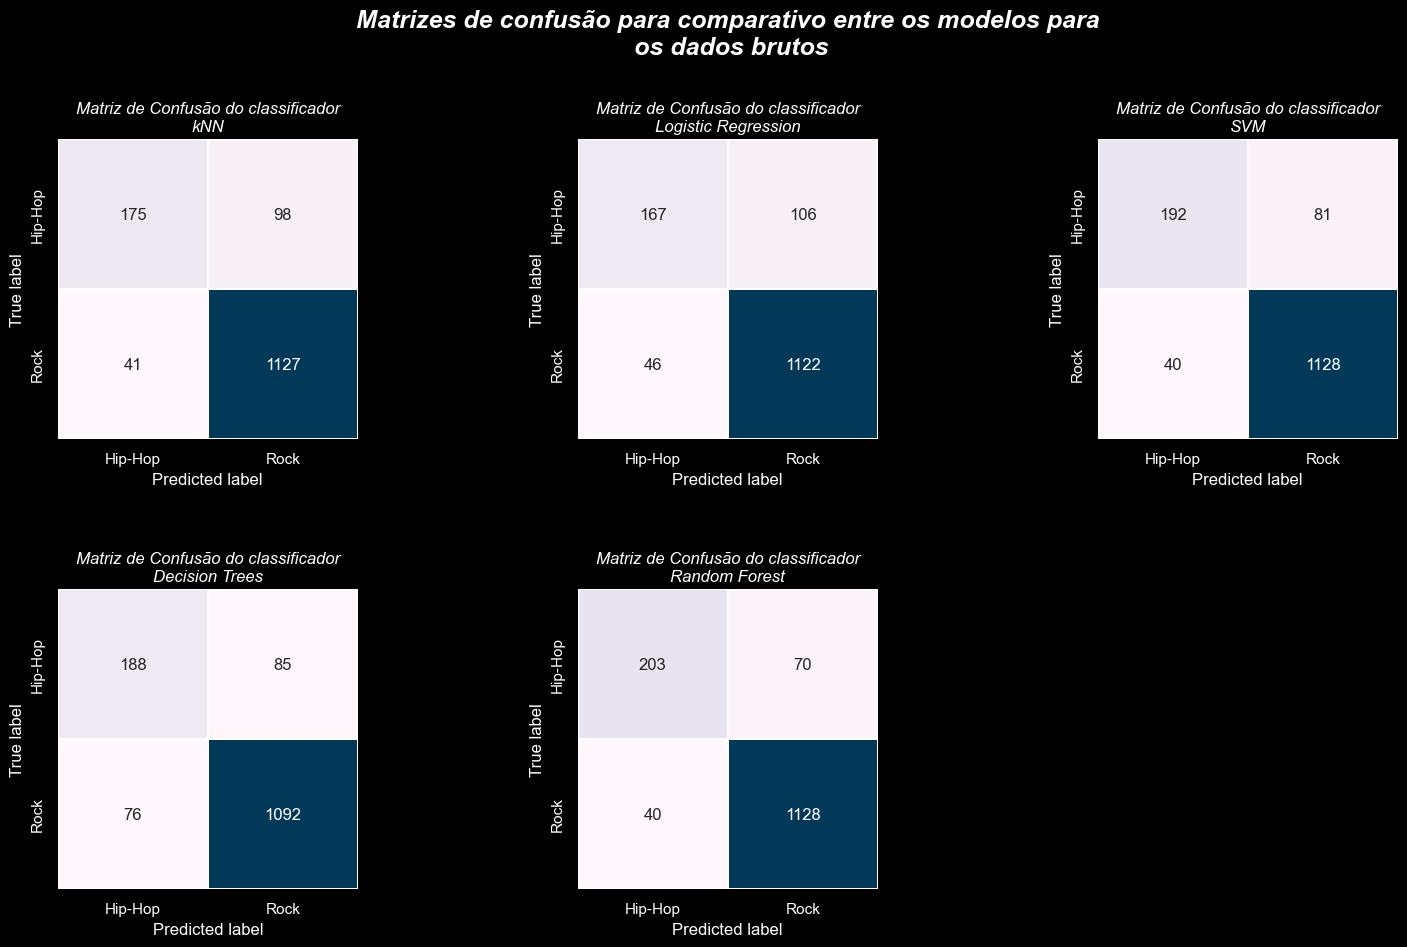





Metricas para o classificador: KNN
              precision    recall  f1-score   support

     Hip-Hop       0.81      0.64      0.72       273
        Rock       0.92      0.96      0.94      1168

    accuracy                           0.90      1441
   macro avg       0.87      0.80      0.83      1441
weighted avg       0.90      0.90      0.90      1441



Metricas para o classificador: LOGISTIC REGRESSION
              precision    recall  f1-score   support

     Hip-Hop       0.78      0.61      0.69       273
        Rock       0.91      0.96      0.94      1168

    accuracy                           0.89      1441
   macro avg       0.85      0.79      0.81      1441
weighted avg       0.89      0.89      0.89      1441



Metricas para o classificador: SVM
              precision    recall  f1-score   support

     Hip-Hop       0.83      0.70      0.76       273
        Rock       0.93      0.97      0.95      1168

    accuracy                           0.92      1441

In [28]:
classifiers = build_classifiers()
results = []
names = []
predicts = []

# Loop para treinamento dos modelos
for name, model, parameters in classifiers:
    print('\n----------------------------------------------------------------------')
    print(f'>> Nome do classificador: {classifier[name]}')
    gs = GridSearchCV(estimator=model, param_grid=parameters, refit=True, verbose=0)
    gs.fit(X_train_scaled, y_train)
    kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
    cv = cross_val_score(gs, X_train_scaled, y_train, cv=kf, scoring='accuracy')
    print(f'Melhor resultado com {gs.best_params_} foi de {gs.best_score_:.4f}')

    predicts.append(gs.predict(X_test_scaled))

    results.append(cv)
    names.append(name)

PREDICTS_ALL['original'] = predicts
RESULTS_ALL['original'] = results

print('\n\n')
title_text = 'Matrizes de confusão para comparativo entre os modelos para\n os dados brutos'
print_conf_matrix(y_test, predicts, title_text)
print('\n')
metric(y_test, predicts)

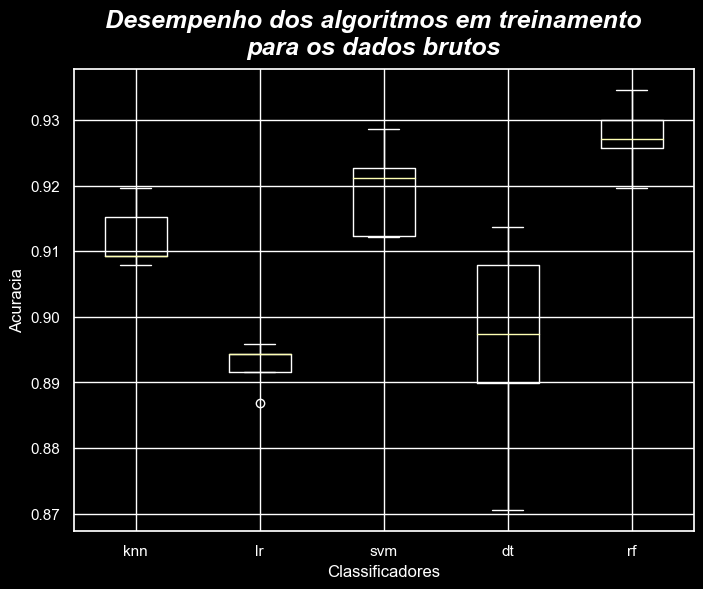

In [29]:
# Plotando o boxplot com resultados do treinamento


result_text = 'Desempenho dos algoritmos em treinamento\npara os dados brutos'
print_result_box(names, results, result_text)

# Análise dos Componentes Principais

###  Uma das formas de se aprimorar o desempenho dos algoritmos de Aprendizado de Máquina e reduzir o overfitting é reduzindo-se o número de atributos de treinamento, tentando-se manter o máximo de informações que descrevam as amostras. Um dos meios de se conseguir isto é através da técnica de Análise dos Componentes Principais, que consiste em reduzir a dimensionalidade dos dados através da exclusão das informações com menor variância nos dados e consequentemente com menor valor informativo.

####  Exibindo a razão de variância explicada do PCA utilizando-se todas os atributos dos dados de treino normalizados

#### Exibindo o resultado na forma de gráfico de barras


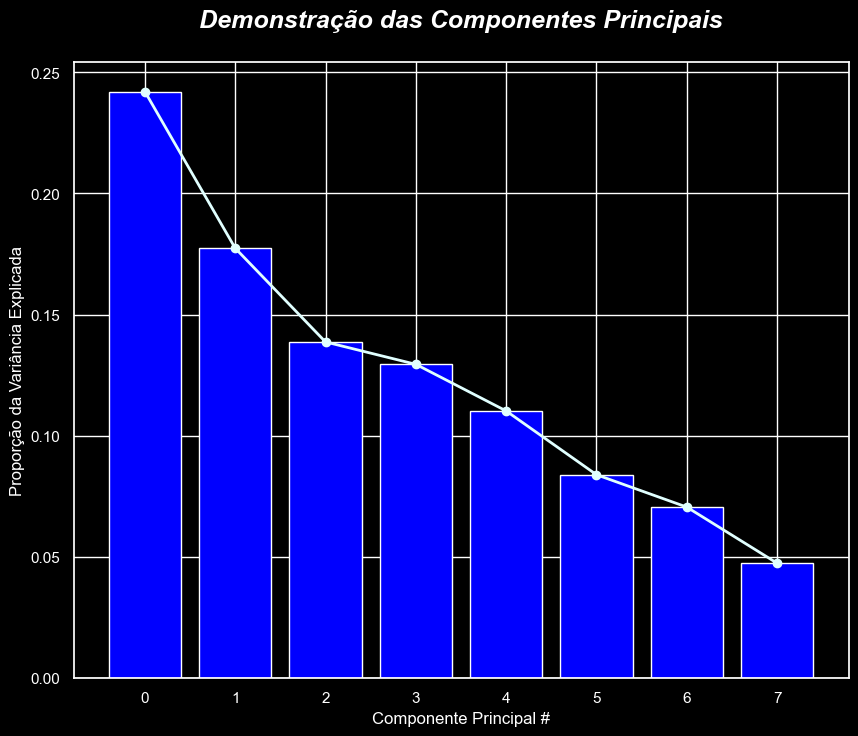

In [44]:

pca = PCA()
pca.fit(X_train_scaled)
exp_variance = pca.explained_variance_ratio_


fig, ax = plt.subplots(figsize=(10,8))
_ = ax.bar(range(pca.n_components_), exp_variance, color='blue')
_ = ax.set_xlabel('Componente Principal #')
_ = ax.set_ylabel('Proporção da Variância Explicada')

pca_values = np.arange(pca.n_components_)
plt.plot(pca_values, pca.explained_variance_ratio_, 'ro-', linewidth=2, color='lightcyan')
plt.title('Demonstração das Componentes Principais\n', fontsize=18, fontweight='bold', style='italic')

plt.show()

### Uma das maneiras de se analisar o número de componentes ideais é procurando um "cotovelo" de formato bem definido na curva dos valores de variância explicada. Porém, não é possível identificar no gráfico o número de dimensões adequadas apenas pela simples observação.

### Uma outra maneira de se identificar a quantidade adequada de dimensões a se manter se dá através da variância explicada acumulada, onde um valor percentual de variância é estipulado. Esse percentual pode ser explicado como a "quantidade" de informação que se deseja manter. Esse valor deve possuir regras claras definidas pelo modelo de negócio.

In [45]:
### !!!Buscando pelo número de componentes principais para se manter 85% da informacao nos dados!!!

In [46]:
perc_inf_pca = 0.85

pca = PCA(n_components=perc_inf_pca, random_state=RANDOM_STATE)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f'Foram identificados {pca.n_components_} componentes principais para se preservar {perc_inf_pca * 100}% da informacao dos dados.')

Foram identificados 6 componentes principais para se preservar 85.0% da informacao dos dados.


## Treinamento dos Modelos após a etapa de Análise dos Componentes Principais


----------------------------------------------------------------------
>> Nome do classificador: kNN
Melhor resultado com {'n_neighbors': 13} foi de 0.9060

----------------------------------------------------------------------
>> Nome do classificador: Logistic Regression
Melhor resultado com {'C': 0.1, 'penalty': 'l2'} foi de 0.8768

----------------------------------------------------------------------
>> Nome do classificador: SVM
Melhor resultado com {'C': 32, 'gamma': 0.03125, 'kernel': 'rbf'} foi de 0.9131

----------------------------------------------------------------------
>> Nome do classificador: Decision Trees
Melhor resultado com {'max_depth': 6} foi de 0.8825

----------------------------------------------------------------------
>> Nome do classificador: Random Forest
Melhor resultado com {'n_estimators': 100} foi de 0.9048





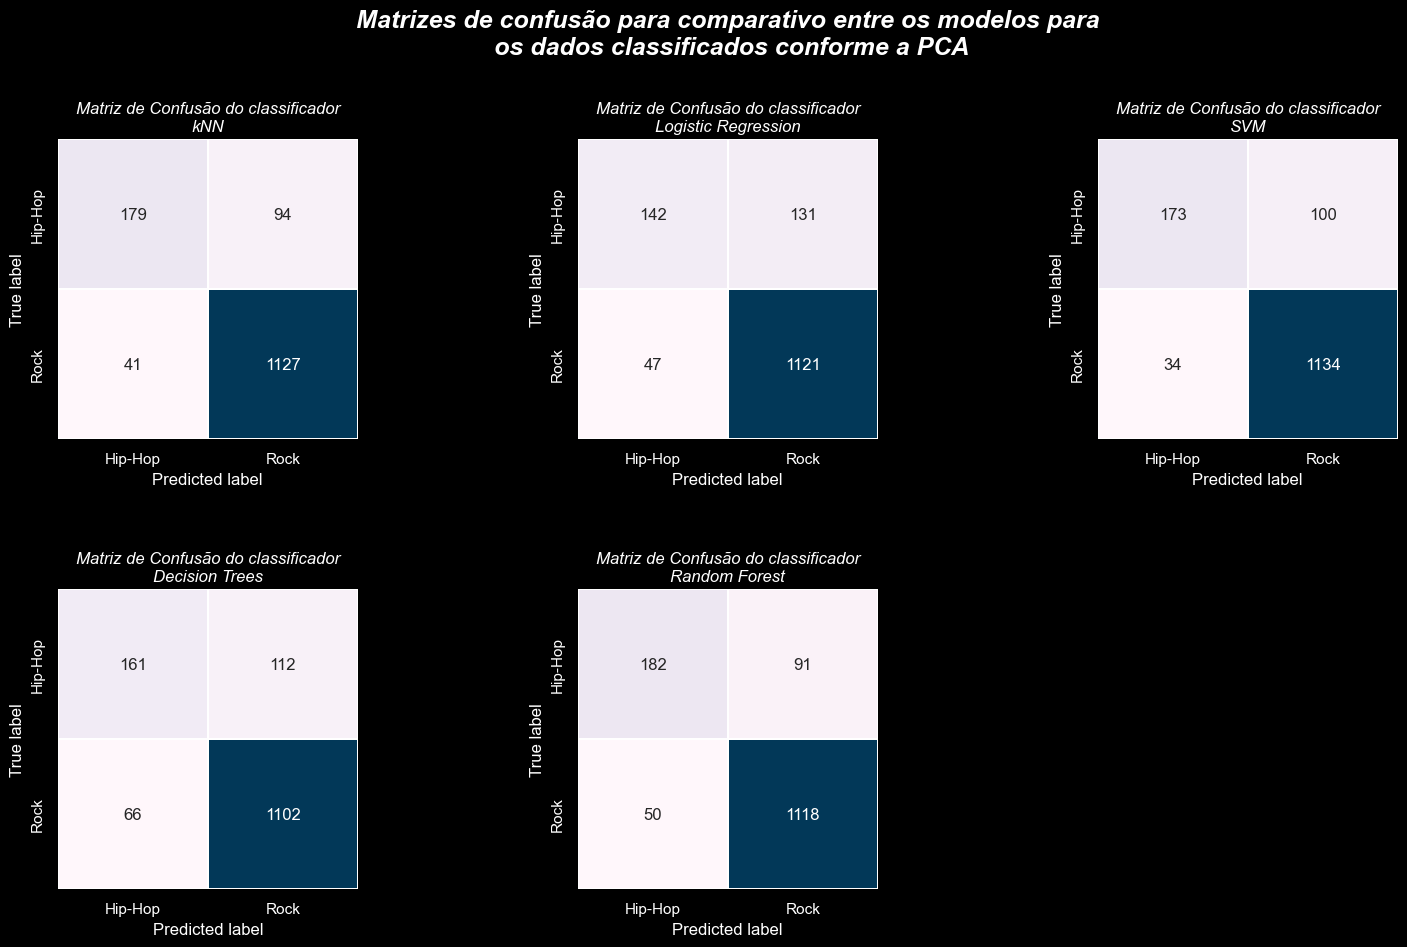





Metricas para o classificador: KNN
              precision    recall  f1-score   support

     Hip-Hop       0.81      0.66      0.73       273
        Rock       0.92      0.96      0.94      1168

    accuracy                           0.91      1441
   macro avg       0.87      0.81      0.83      1441
weighted avg       0.90      0.91      0.90      1441



Metricas para o classificador: LOGISTIC REGRESSION
              precision    recall  f1-score   support

     Hip-Hop       0.75      0.52      0.61       273
        Rock       0.90      0.96      0.93      1168

    accuracy                           0.88      1441
   macro avg       0.82      0.74      0.77      1441
weighted avg       0.87      0.88      0.87      1441



Metricas para o classificador: SVM
              precision    recall  f1-score   support

     Hip-Hop       0.84      0.63      0.72       273
        Rock       0.92      0.97      0.94      1168

    accuracy                           0.91      1441

In [47]:
classifiers = build_classifiers()
results = []
names = []
predicts = []

for name, model, parameters in classifiers:
    print('\n----------------------------------------------------------------------')
    print(f'>> Nome do classificador: {classifier[name]}')
    gs = GridSearchCV(estimator=model, param_grid=parameters, refit=True, verbose=0)
    gs.fit(X_train_pca, y_train)
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv = cross_val_score(gs, X_train_pca, y_train, cv=kf, scoring='accuracy')
    print(f'Melhor resultado com {gs.best_params_} foi de {gs.best_score_:.4f}')

    predicts.append(gs.predict(X_test_pca))

    results.append(cv)
    names.append(name)

PREDICTS_ALL['pca'] = predicts
RESULTS_ALL['pca'] = results

print('\n\n')
title_text = 'Matrizes de confusão para comparativo entre os modelos para\n os dados classificados conforme a PCA'
print_conf_matrix(y_test, predicts, title_text)
print('\n')
metric(y_test, predicts)

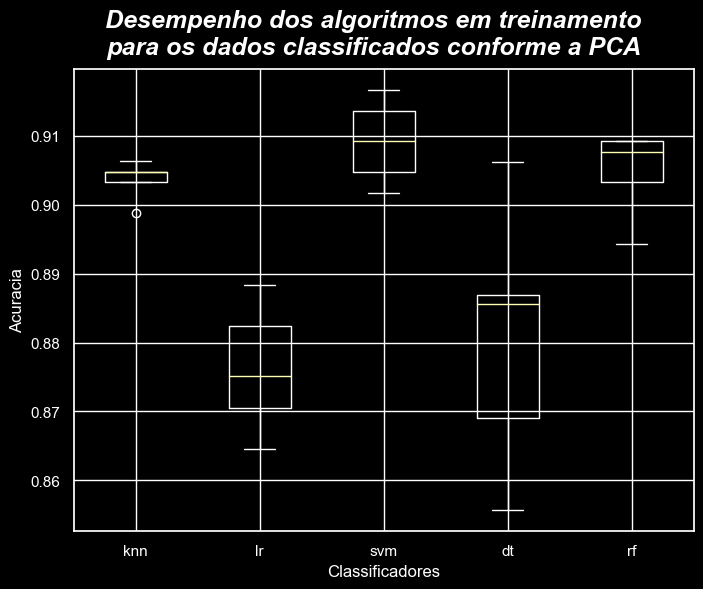

In [48]:
result_text = 'Desempenho dos algoritmos em treinamento\npara os dados classificados conforme a PCA'
print_result_box(names, results, result_text)

In [51]:
# Divisao de subsets para os rotulos Rock e Hip-Hop

hop_only = echo_tracks[echo_tracks['genre_top'] == 'Hip-Hop']
rock_only = echo_tracks[echo_tracks['genre_top'] == 'Rock']


# Amostragem das amostras rotuladas como Rock ate a quantidade das amostras de Hip-Hop

rock_only = rock_only.sample(len(hop_only), random_state=RANDOM_STATE)


# Concatenacao dos subsets para criacao do DataFrame contendo os dois rotulos

rock_hop_bal = pd.concat([rock_only, hop_only])


# Verificacao da quantidade de instancias existentes em cada atributo genero

print(f"O dataset possui {rock_hop_bal[rock_hop_bal['genre_top'] == 'Rock'].count()['genre_top']} musicas classificadas como sendo do genero ROCK.")
print(f"O dataset possui {rock_hop_bal[rock_hop_bal['genre_top'] == 'Hip-Hop'].count()['genre_top']} musicas classificadas como sendo do genero HIP-HOP.\n\n")

O dataset possui 910 musicas classificadas como sendo do genero ROCK.
O dataset possui 910 musicas classificadas como sendo do genero HIP-HOP.




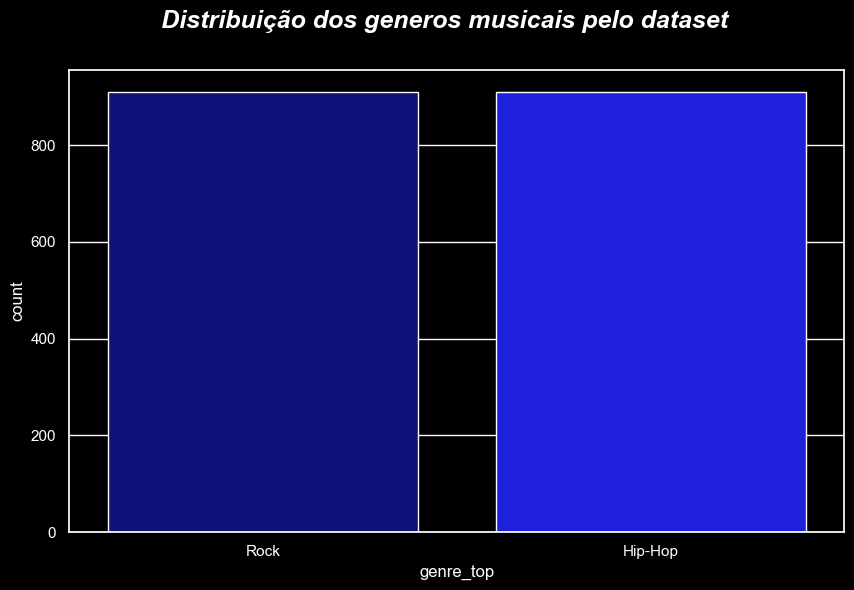

In [55]:
fig = plt.figure(figsize=(10,6))
plt.suptitle('Distribuição dos generos musicais pelo dataset', fontsize=18, fontweight='bold', style='italic')
sns.countplot(x=rock_hop_bal['genre_top'], palette=(color1), edgecolor='white')
plt.show()

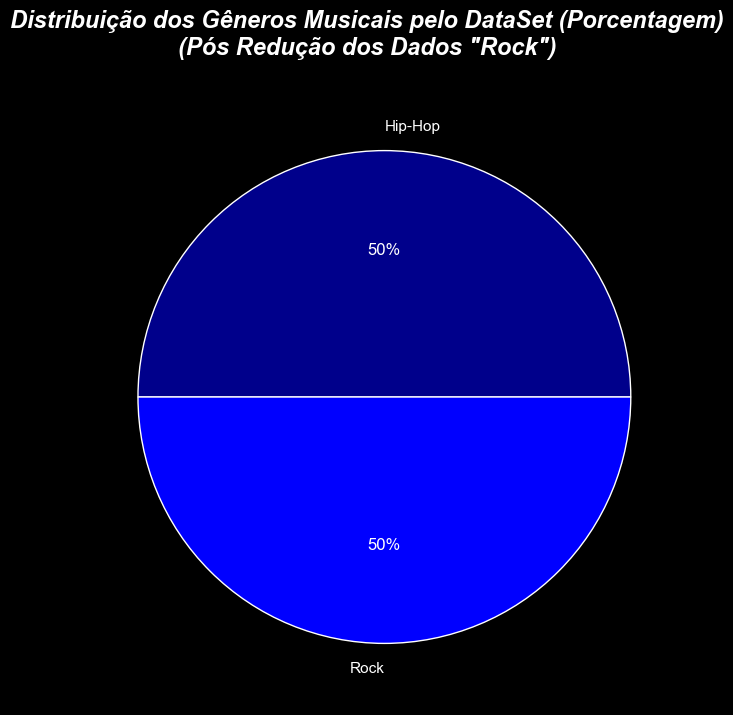

In [57]:
geeneero = ['Hip-Hop', 'Rock']
poos_reduccao = ['910', '910']


plt.style.use('dark_background')
color1 = sns.color=('darkblue','blue')


fig = plt.figure(figsize=(14,8))
plt.suptitle('Distribuição dos Gêneros Musicais pelo DataSet (Porcentagem)\n(Pós Redução dos Dados "Rock")', fontsize=17, fontweight='bold', style='italic')
plt.pie(poos_reduccao, labels=geeneero, colors=(color1), autopct='%.0f%%')
plt.show(); 

In [58]:
# Divisao do dataframe em subsets de atributos e rotulos
X_bal = rock_hop_bal.drop(['genre_top', 'track_id'], axis=1) 
y_bal = rock_hop_bal['genre_top']


# Divisao dos subsets em sets de treino e teste
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_bal, y_bal, random_state=RANDOM_STATE, train_size=0.7, stratify=y_bal)


print(f'X_train shape: {X_train_bal.shape}')
print(f'y_train shape: {y_train_bal.shape}')
print(f'\nX_test shape: {X_test_bal.shape}')
print(f'y_test shape: {y_test_bal.shape}')


# Quantidade de instâncias selecionadas para os subsets de treino e teste
print(f'\n\nSet de treino: {np.unique(y_train_bal, return_counts=True)}')
print(f'Set de teste: {np.unique(y_test_bal, return_counts=True)}')

X_train shape: (1274, 8)
y_train shape: (1274,)

X_test shape: (546, 8)
y_test shape: (546,)


Set de treino: (array(['Hip-Hop', 'Rock'], dtype=object), array([637, 637], dtype=int64))
Set de teste: (array(['Hip-Hop', 'Rock'], dtype=object), array([273, 273], dtype=int64))


In [59]:
X_train_bal_scaled = scaler.fit_transform(X_train_bal)
X_test_bal_scaled = scaler.transform(X_test_bal)


----------------------------------------------------------------------
>> Nome do classificador: kNN
Melhor resultado com {'n_neighbors': 25} foi de 0.8579

----------------------------------------------------------------------
>> Nome do classificador: Logistic Regression
Melhor resultado com {'C': 100, 'penalty': 'l2'} foi de 0.8516

----------------------------------------------------------------------
>> Nome do classificador: SVM
Melhor resultado com {'C': 32, 'gamma': 0.03125, 'kernel': 'rbf'} foi de 0.8720

----------------------------------------------------------------------
>> Nome do classificador: Decision Trees
Melhor resultado com {'max_depth': 4} foi de 0.8666

----------------------------------------------------------------------
>> Nome do classificador: Random Forest
Melhor resultado com {'n_estimators': 100} foi de 0.8956





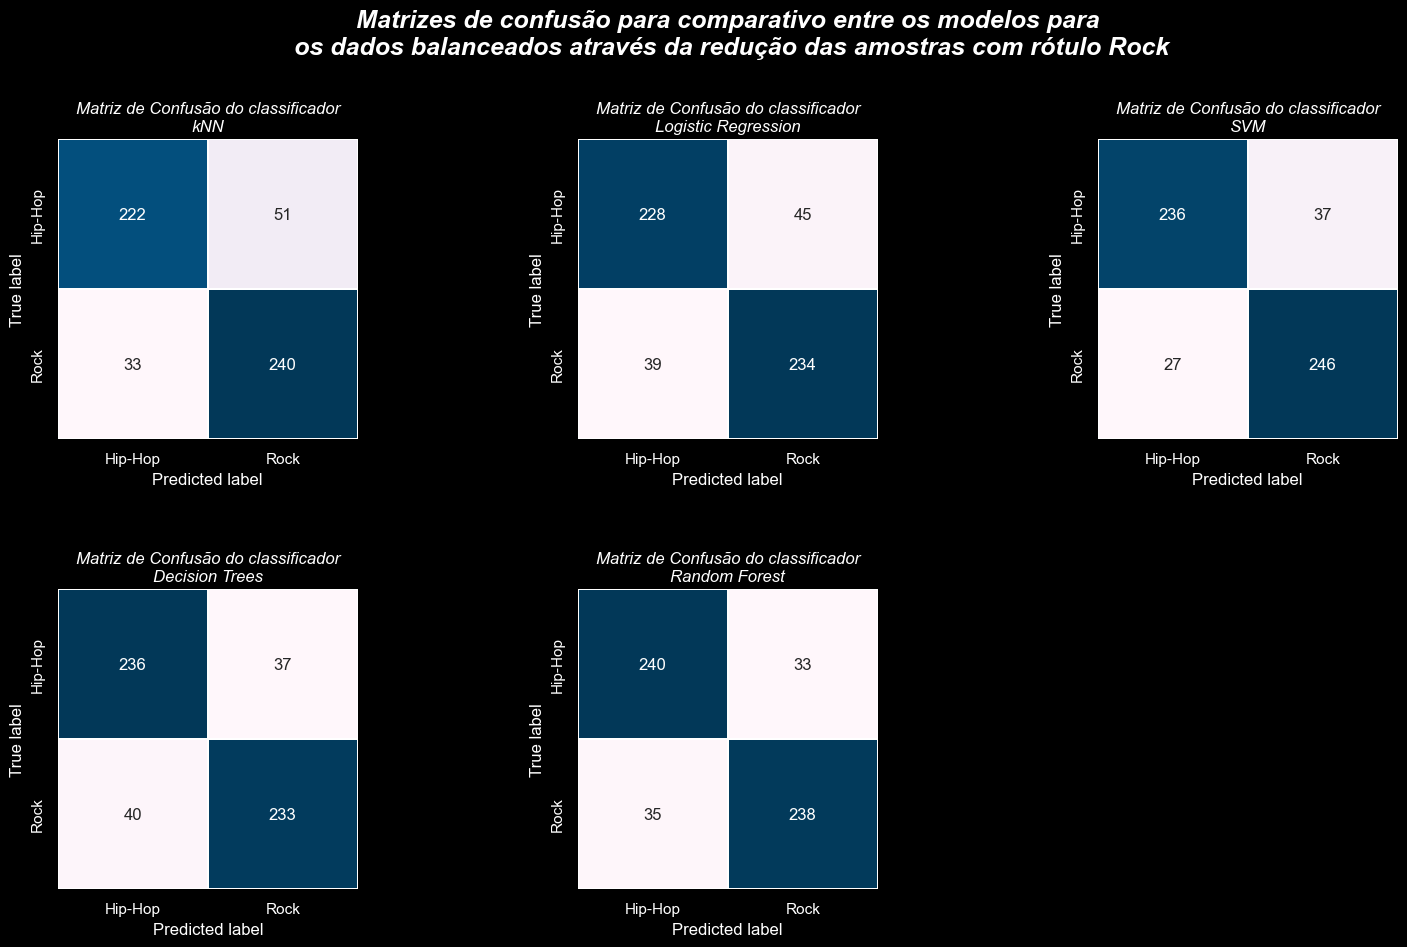





Metricas para o classificador: KNN
              precision    recall  f1-score   support

     Hip-Hop       0.87      0.81      0.84       273
        Rock       0.82      0.88      0.85       273

    accuracy                           0.85       546
   macro avg       0.85      0.85      0.85       546
weighted avg       0.85      0.85      0.85       546



Metricas para o classificador: LOGISTIC REGRESSION
              precision    recall  f1-score   support

     Hip-Hop       0.85      0.84      0.84       273
        Rock       0.84      0.86      0.85       273

    accuracy                           0.85       546
   macro avg       0.85      0.85      0.85       546
weighted avg       0.85      0.85      0.85       546



Metricas para o classificador: SVM
              precision    recall  f1-score   support

     Hip-Hop       0.90      0.86      0.88       273
        Rock       0.87      0.90      0.88       273

    accuracy                           0.88       546

In [60]:
classifiers = build_classifiers()
results = []
names = []
predicts = []

for name, model, parameters in classifiers:
    print('\n----------------------------------------------------------------------')
    print(f'>> Nome do classificador: {classifier[name]}')
    gs = GridSearchCV(estimator=model, param_grid=parameters, refit=True, verbose=0)
    gs.fit(X_train_bal_scaled, y_train_bal)
    kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
    cv = cross_val_score(gs, X_train_bal_scaled, y_train_bal, cv=kf, scoring='accuracy')
    print(f'Melhor resultado com {gs.best_params_} foi de {gs.best_score_:.4f}')

    predicts.append(gs.predict(X_test_bal_scaled))

    results.append(cv)
    names.append(name)

PREDICTS_ALL['red_rock'] = predicts
RESULTS_ALL['red_rock'] = results

print('\n\n')
title_text = 'Matrizes de confusão para comparativo entre os modelos para\n os dados balanceados através da redução das amostras com rótulo Rock'
print_conf_matrix(y_test_bal, predicts, title_text)
print('\n')
metric(y_test_bal, predicts)

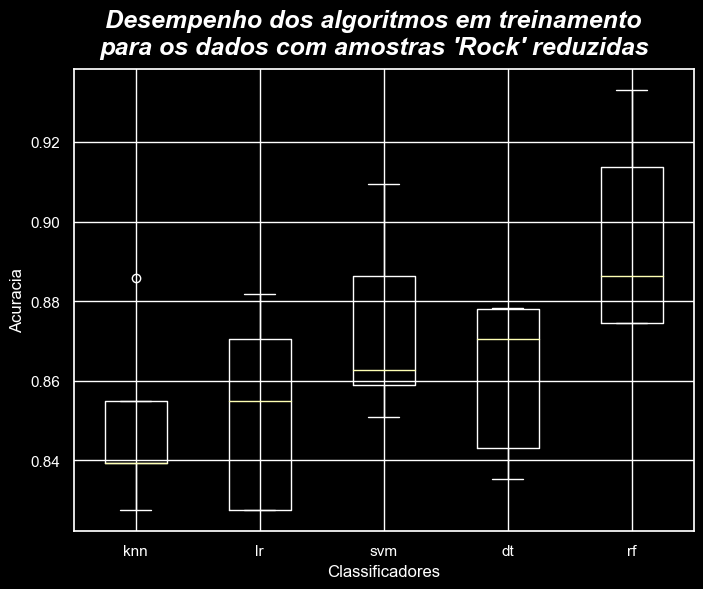

In [61]:
result_text = "Desempenho dos algoritmos em treinamento\npara os dados com amostras 'Rock' reduzidas"
print_result_box(names, results, result_text)

In [64]:

# Criacao de novo dataframe original para plotagem e analise dos dados de cada classe individual
df_full = echo_tracks.drop('track_id', axis=1)


# Geracao de histograma e boxplot para analise de cada atributo
for key in df_full.columns.tolist():
    if key != 'genre_top':
        fig = px.histogram(df_full, x=key, opacity=0.4, barmode='overlay', histnorm='percent', marginal='box', color='genre_top',
                     color_discrete_sequence=['blue', 'cyan'],  width=1000, height=600, nbins=40)  
        fig.update_yaxes(matches=None)

        fig.update_layout(legend = dict(orientation="h", yanchor="bottom", y=1, xanchor="right", x=1))
        fig.update_layout(plot_bgcolor='white', showlegend=True)

        fig.update_xaxes(showline=True, linewidth=2, linecolor='black')
        fig.update_yaxes(showline=True, linewidth=2, linecolor='black')

        fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='gray')
        fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='gray')

        fig.show()

In [65]:
hop_only.drop('track_id', axis=1).describe()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
count,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000
mean,0.412649,0.620385,0.562114,0.350269,0.190199,0.254705,118.632192,0.589433
std,0.319630,0.162625,0.202753,0.399992,0.153025,0.207941,38.107902,0.228994
min,0.000009,0.129479,0.007619,0.000000,0.030791,0.023234,43.988000,0.031204
25%,0.098531,0.504963,0.421141,0.000103,0.102181,0.081689,91.382000,0.438432
50%,0.389164,0.639822,0.555546,0.068806,0.122481,0.192581,100.010500,0.612369
75%,0.700163,0.743248,0.716701,0.829866,0.224583,0.379705,153.963000,0.773514
max,0.992276,0.961871,0.990904,0.982635,0.947659,0.966177,224.955000,0.983199


In [66]:
difference = len(echo_tracks[echo_tracks['genre_top'] == 'Rock']) - len(echo_tracks[echo_tracks['genre_top'] == 'Hip-Hop'])
print(f' A diferenca de amostras entre as duas classes e de {difference} instancias.')

 A diferenca de amostras entre as duas classes e de 2982 instancias.


In [67]:
# Cria uma lista para receber as listas geradas randomicamente
list_new_features_hop = []


# Dicionario para receber a lista dos atributos gerados
new_features = {}


# Semente para a funcao randomica
rng = np.random.default_rng(RANDOM_STATE)


# Cria uma lista para cada atributo conforme a analise estatistica dos atributos e a adiciona na lista geral
list_new_features_hop.append(rng.integers(low=0, high=4000, size=difference) / 10000)
list_new_features_hop.append(rng.integers(low=4000, high=8500, size=difference) / 10000)
list_new_features_hop.append(rng.integers(low=4000, high=9000, size=difference) / 10000)
list_new_features_hop.append(rng.integers(low=0, high=1200, size=difference) / 10000)
list_new_features_hop.append(rng.integers(low=500, high=2000, size=difference) / 10000)
list_new_features_hop.append(rng.integers(low=0, high=3000, size=difference) / 10000)
list_new_features_hop.append(rng.integers(low=80, high=130, size=difference))
list_new_features_hop.append(rng.integers(low=4500, high=9000, size=difference) / 10000)


# Passa as listas geradas para o formato de dicionario
for i,key in enumerate(hop_only.drop(['track_id', 'genre_top'], axis=1).columns.tolist()):
    new_features[key] = list_new_features_hop[i]


# Cria novo dataframe com os valores gerados randomicamente
df_new_hop = pd.DataFrame.from_dict(new_features)
df_new_hop['genre_top'] = 'Hip-Hop'
df_new_hop

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,0.0357,0.7604,0.7718,0.0091,0.1954,0.0850,127,0.5561,Hip-Hop
1,0.3095,0.7699,0.4497,0.0048,0.1541,0.1615,82,0.8607,Hip-Hop
2,0.2618,0.7238,0.7590,0.1124,0.0835,0.1510,125,0.6879,Hip-Hop
3,0.1755,0.6916,0.7031,0.0594,0.0860,0.2193,116,0.8630,Hip-Hop
4,0.1732,0.7364,0.4962,0.0134,0.0612,0.1874,99,0.8764,Hip-Hop
...,...,...,...,...,...,...,...,...,...
2977,0.3587,0.7937,0.8528,0.0186,0.1127,0.2295,94,0.6070,Hip-Hop
2978,0.1131,0.4784,0.8615,0.1180,0.0654,0.2621,106,0.8089,Hip-Hop
2979,0.1902,0.6761,0.5393,0.0597,0.1404,0.2357,129,0.6265,Hip-Hop
2980,0.2868,0.7733,0.4095,0.0189,0.1600,0.1488,90,0.6561,Hip-Hop


In [68]:
# Tamanho desejado para aumento das amostras da classe Hip-Hop
# Novo tamanho = proporcao do set original da classe Hip-Hop (910 amostras)
size_hop = 1.5


# Cria novos subsets para as classes Rock e Hip-Hop
hop_only = echo_tracks[echo_tracks['genre_top'] == 'Hip-Hop']
hop_only = hop_only.drop('track_id', axis=1)


rock_only = echo_tracks[echo_tracks['genre_top'] == 'Rock']


# Define a quantidade de amostras do novo subset da classe Hip-Hop
new_size_hop = int(size_hop * len(hop_only))
new_size_hop


# Realiza a amostragem no subset de instancias geradas randomicamente conforme o tamanho das amostras definido acima
sub_new_hop = df_new_hop.sample(new_size_hop - len(hop_only), random_state=RANDOM_STATE)


# Concatena os sets originais e o randomico em um unico subset
new_hop_only = pd.concat([sub_new_hop, hop_only])


# Realiza a amostragem das instancias da classe Rock ate a quantidade de amostras do novo set Hip-Hop
rock_red = rock_only.sample(len(new_hop_only), random_state=RANDOM_STATE)


# Concatena os dois subsets para a geracao de novo dataframe
new_rock_hop = pd.concat([rock_red.drop('track_id', axis=1), new_hop_only])


# Verificacao da quantidade de instancias existentes em cada atributo genero
print(f"O dataset possui {new_rock_hop[new_rock_hop['genre_top'] == 'Rock'].count()['genre_top']} musicas classificadas como sendo do genero ROCK.")
print(f"O dataset possui {new_rock_hop[new_rock_hop['genre_top'] == 'Hip-Hop'].count()['genre_top']} musicas classificadas como sendo do genero HIP-HOP.\n\n")

O dataset possui 1365 musicas classificadas como sendo do genero ROCK.
O dataset possui 1365 musicas classificadas como sendo do genero HIP-HOP.




In [69]:
# Divisao do dataframe em subsets de atributos e rotulos
X_new = new_rock_hop.drop('genre_top', axis=1) 
y_new = new_rock_hop['genre_top']


# Divisao dos subsets em sets de treino e teste
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, random_state=RANDOM_STATE, train_size=0.7, stratify=y_new)


print(f'X_train shape: {X_train_new.shape}')
print(f'y_train shape: {y_train_new.shape}')
print(f'\nX_test shape: {X_test_new.shape}')
print(f'y_test shape: {y_test_new.shape}')


# Quantidade de instâncias selecionadas para os subsets de treino e teste
print(f'\n\nSet de treino: {np.unique(y_train_new, return_counts=True)}')
print(f'Set de teste: {np.unique(y_test_new, return_counts=True)}')

X_train shape: (1910, 8)
y_train shape: (1910,)

X_test shape: (820, 8)
y_test shape: (820,)


Set de treino: (array(['Hip-Hop', 'Rock'], dtype=object), array([955, 955], dtype=int64))
Set de teste: (array(['Hip-Hop', 'Rock'], dtype=object), array([410, 410], dtype=int64))


In [70]:
X_train_new_scaled = scaler.fit_transform(X_train_new)
X_test_new_scaled = scaler.transform(X_test_new)


----------------------------------------------------------------------
>> Nome do classificador: kNN
Melhor resultado com {'n_neighbors': 5} foi de 0.8696

----------------------------------------------------------------------
>> Nome do classificador: Logistic Regression
Melhor resultado com {'C': 1, 'penalty': 'l2'} foi de 0.8660

----------------------------------------------------------------------
>> Nome do classificador: SVM
Melhor resultado com {'C': 32, 'gamma': 0.03125, 'kernel': 'rbf'} foi de 0.8822

----------------------------------------------------------------------
>> Nome do classificador: Decision Trees
Melhor resultado com {'max_depth': 8} foi de 0.8717

----------------------------------------------------------------------
>> Nome do classificador: Random Forest
Melhor resultado com {'n_estimators': 100} foi de 0.9099





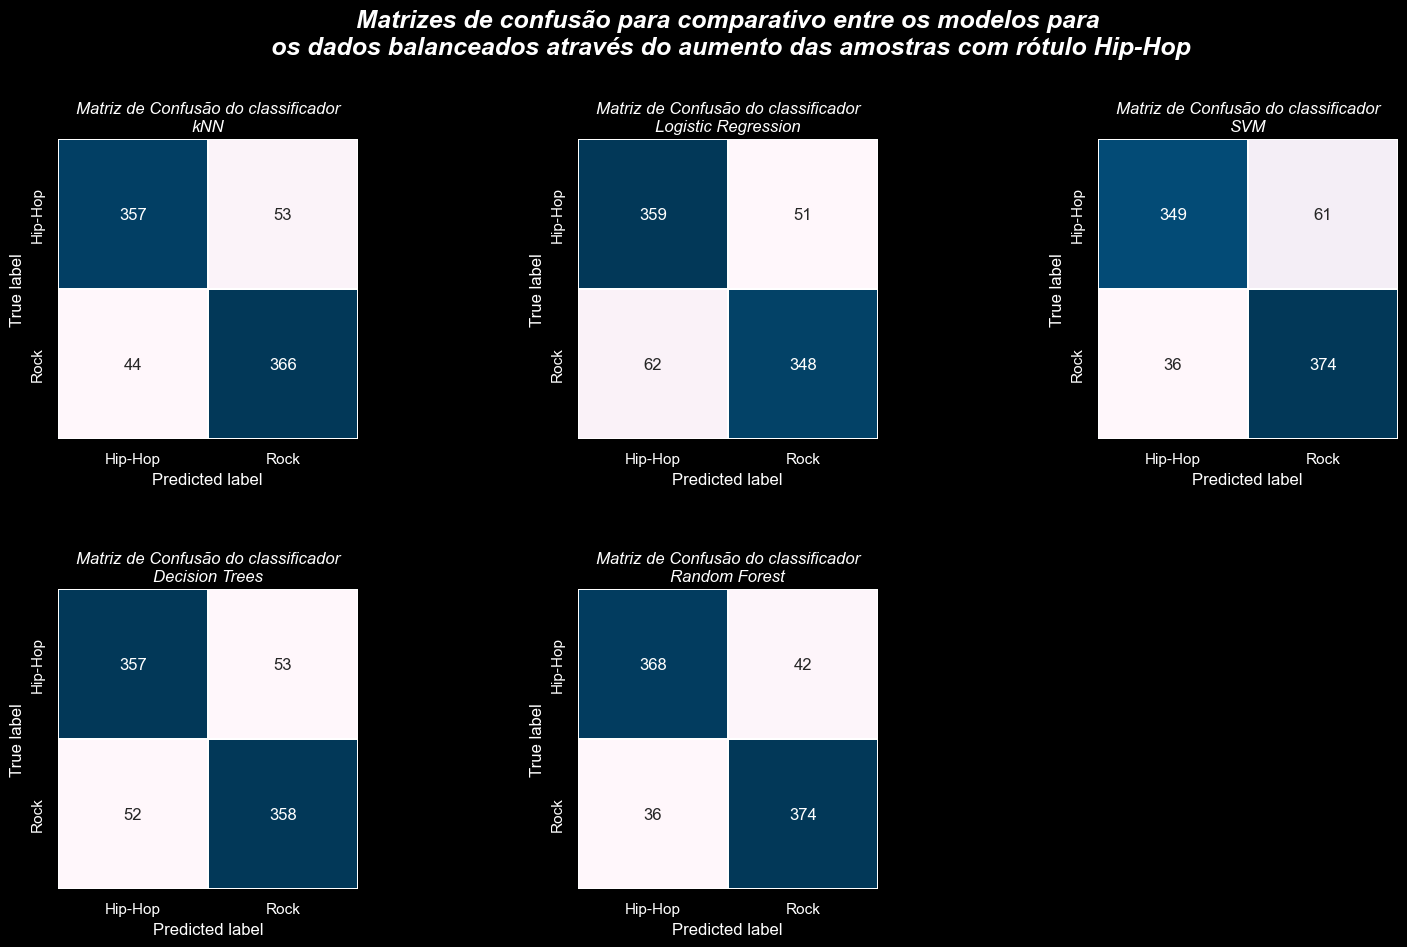





Metricas para o classificador: KNN
              precision    recall  f1-score   support

     Hip-Hop       0.89      0.87      0.88       410
        Rock       0.87      0.89      0.88       410

    accuracy                           0.88       820
   macro avg       0.88      0.88      0.88       820
weighted avg       0.88      0.88      0.88       820



Metricas para o classificador: LOGISTIC REGRESSION
              precision    recall  f1-score   support

     Hip-Hop       0.85      0.88      0.86       410
        Rock       0.87      0.85      0.86       410

    accuracy                           0.86       820
   macro avg       0.86      0.86      0.86       820
weighted avg       0.86      0.86      0.86       820



Metricas para o classificador: SVM
              precision    recall  f1-score   support

     Hip-Hop       0.91      0.85      0.88       410
        Rock       0.86      0.91      0.89       410

    accuracy                           0.88       820

In [71]:
classifiers = build_classifiers()
results = []
names = []
predicts = []

for name, model, parameters in classifiers:
    print('\n----------------------------------------------------------------------')
    print(f'>> Nome do classificador: {classifier[name]}')
    gs = GridSearchCV(estimator=model, param_grid=parameters, refit=True, verbose=0)
    gs.fit(X_train_new_scaled, y_train_new)
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv = cross_val_score(gs, X_train_new_scaled, y_train_new, cv=kf, scoring='accuracy')
    print(f'Melhor resultado com {gs.best_params_} foi de {gs.best_score_:.4f}')

    predicts.append(gs.predict(X_test_new_scaled))

    results.append(cv)
    names.append(name)

PREDICTS_ALL['aum_hiphop'] = predicts
RESULTS_ALL['aum_hiphop'] = results

print('\n\n')
title_text = 'Matrizes de confusão para comparativo entre os modelos para\n os dados balanceados através do aumento das amostras com rótulo Hip-Hop'
print_conf_matrix(y_test_new, predicts, title_text)
print('\n')
metric(y_test_new, predicts)

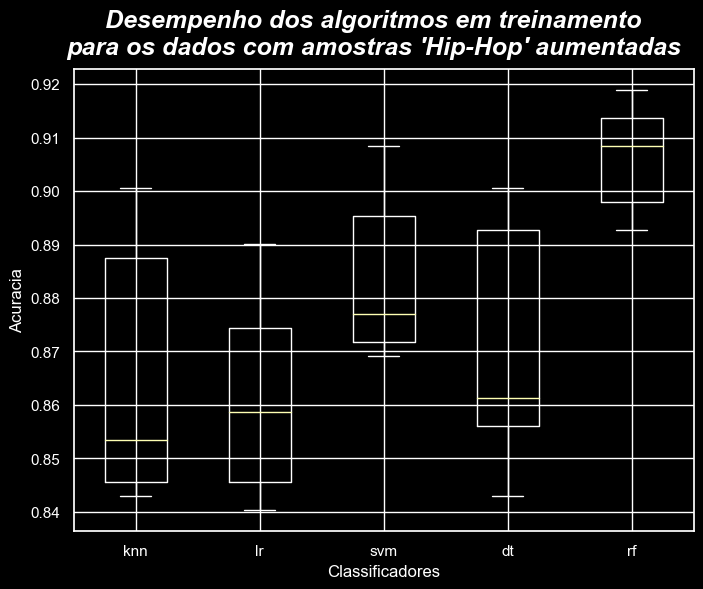

In [72]:
result_text = "Desempenho dos algoritmos em treinamento\npara os dados com amostras 'Hip-Hop' aumentadas"
print_result_box(names, results, result_text)

In [73]:
tests = [test for test in PREDICTS_ALL.keys()]

In [74]:
knn, lr, svm, dt, rf = [], [], [], [], []

for test in tests:
    knn.append(PREDICTS_ALL[test][0])
    lr.append(PREDICTS_ALL[test][1])
    svm.append(PREDICTS_ALL[test][2])
    dt.append(PREDICTS_ALL[test][3])
    rf.append(PREDICTS_ALL[test][4])

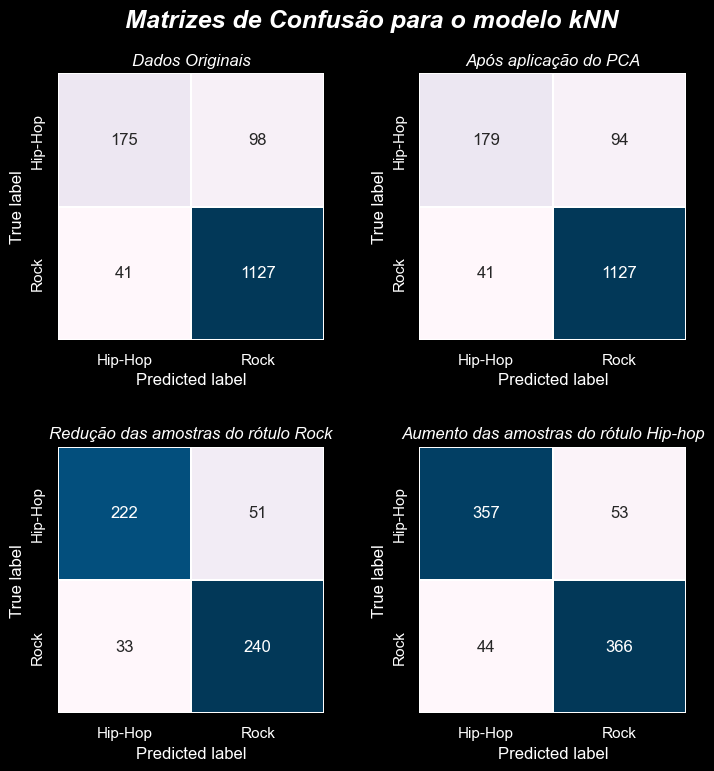

In [75]:
fig = plt.figure(figsize=(8,8))
fig.suptitle('Matrizes de Confusão para o modelo kNN', fontsize=18, fontweight='bold', style='italic')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)

plt.subplot(2, 2, 1)
plt.title('Dados Originais', style='italic')
sns.heatmap(confusion_matrix(y_test, knn[0]), square=True, annot=True, fmt='d', cbar=False, linewidths=0.3, cmap='PuBu', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.subplot(2, 2, 2)
plt.title('Após aplicação do PCA', style='italic')
sns.heatmap(confusion_matrix(y_test, knn[1]), square=True, annot=True, fmt='d', cbar=False, linewidths=0.3, cmap='PuBu', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.subplot(2, 2, 3)
plt.title('Redução das amostras do rótulo Rock', style='italic')
sns.heatmap(confusion_matrix(y_test_bal, knn[2]), square=True, annot=True, fmt='d', cbar=False, linewidths=0.3, cmap='PuBu', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.subplot(2, 2, 4)
plt.title('Aumento das amostras do rótulo Hip-hop', style='italic')
sns.heatmap(confusion_matrix(y_test_new, knn[3]), square=True, annot=True, fmt='d', cbar=False, linewidths=0.3, cmap='PuBu', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

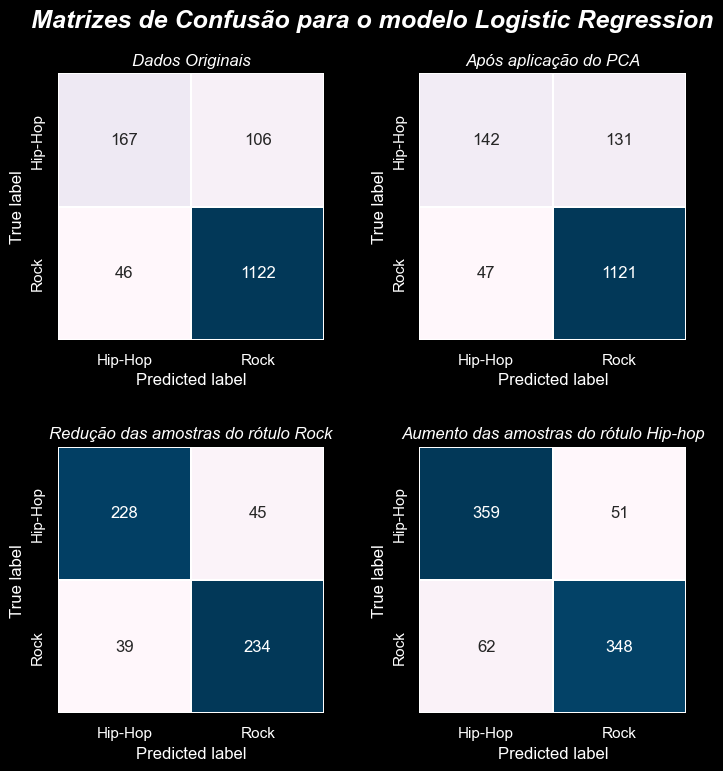

In [76]:
fig = plt.figure(figsize=(8,8))
fig.suptitle('Matrizes de Confusão para o modelo Logistic Regression', fontsize=18, fontweight='bold', style='italic')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)

plt.subplot(2, 2, 1)
plt.title('Dados Originais', style='italic')
sns.heatmap(confusion_matrix(y_test, lr[0]), square=True, annot=True, fmt='d', cbar=False, linewidths=0.3, cmap='PuBu', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.subplot(2, 2, 2)
plt.title('Após aplicação do PCA', style='italic')
sns.heatmap(confusion_matrix(y_test, lr[1]), square=True, annot=True, fmt='d', cbar=False, linewidths=0.3, cmap='PuBu', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.subplot(2, 2, 3)
plt.title('Redução das amostras do rótulo Rock', style='italic')
sns.heatmap(confusion_matrix(y_test_bal, lr[2]), square=True, annot=True, fmt='d', cbar=False, linewidths=0.3, cmap='PuBu', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.subplot(2, 2, 4)
plt.title('Aumento das amostras do rótulo Hip-hop', style='italic')
sns.heatmap(confusion_matrix(y_test_new, lr[3]), square=True, annot=True, fmt='d', cbar=False, linewidths=0.3, cmap='PuBu', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

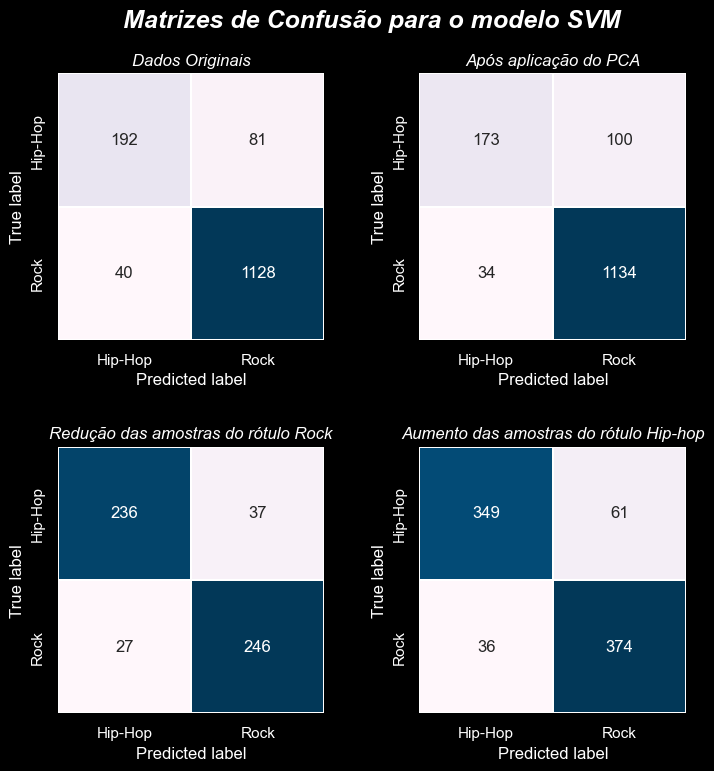

In [77]:
fig = plt.figure(figsize=(8,8))
fig.suptitle('Matrizes de Confusão para o modelo SVM', fontsize=18, fontweight='bold', style='italic')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)

plt.subplot(2, 2, 1)
plt.title('Dados Originais', style='italic')
sns.heatmap(confusion_matrix(y_test, svm[0]), square=True, annot=True, fmt='d', cbar=False, linewidths=0.3, cmap='PuBu', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.subplot(2, 2, 2)
plt.title('Após aplicação do PCA', style='italic')
sns.heatmap(confusion_matrix(y_test, svm[1]), square=True, annot=True, fmt='d', cbar=False, linewidths=0.3, cmap='PuBu', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.subplot(2, 2, 3)
plt.title('Redução das amostras do rótulo Rock', style='italic')
sns.heatmap(confusion_matrix(y_test_bal, svm[2]), square=True, annot=True, fmt='d', cbar=False, linewidths=0.3, cmap='PuBu', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.subplot(2, 2, 4)
plt.title('Aumento das amostras do rótulo Hip-hop', style='italic')
sns.heatmap(confusion_matrix(y_test_new, svm[3]), square=True, annot=True, fmt='d', cbar=False, linewidths=0.3, cmap='PuBu', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

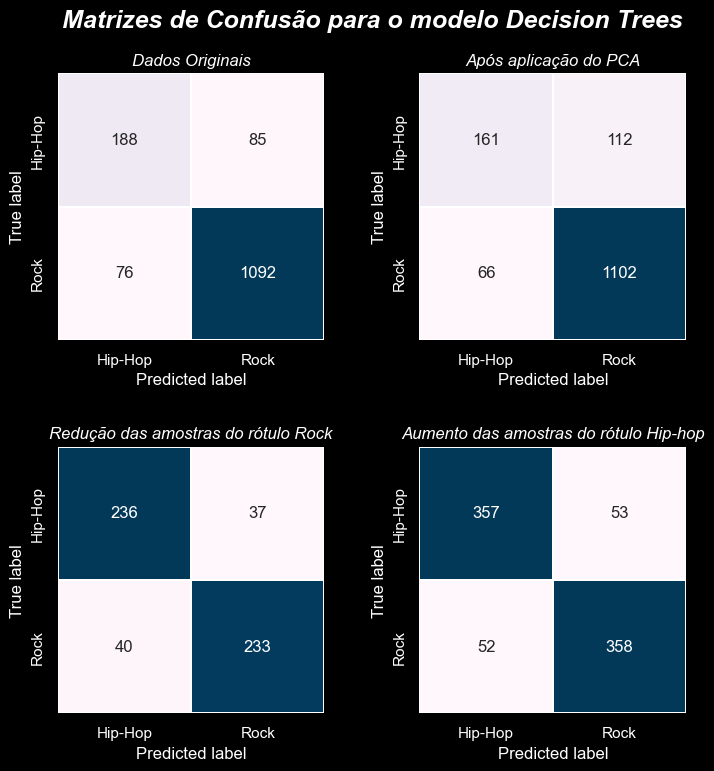

In [78]:
fig = plt.figure(figsize=(8,8))
fig.suptitle('Matrizes de Confusão para o modelo Decision Trees', fontsize=18, fontweight='bold', style='italic')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)

plt.subplot(2, 2, 1)
plt.title('Dados Originais', style='italic')
sns.heatmap(confusion_matrix(y_test, dt[0]), square=True, annot=True, fmt='d', cbar=False, linewidths=0.3, cmap='PuBu', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.subplot(2, 2, 2)
plt.title('Após aplicação do PCA', style='italic')
sns.heatmap(confusion_matrix(y_test, dt[1]), square=True, annot=True, fmt='d', cbar=False, linewidths=0.3, cmap='PuBu', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.subplot(2, 2, 3)
plt.title('Redução das amostras do rótulo Rock', style='italic')
sns.heatmap(confusion_matrix(y_test_bal, dt[2]), square=True, annot=True, fmt='d', cbar=False, linewidths=0.3, cmap='PuBu', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.subplot(2, 2, 4)
plt.title('Aumento das amostras do rótulo Hip-hop', style='italic')
sns.heatmap(confusion_matrix(y_test_new, dt[3]), square=True, annot=True, fmt='d', cbar=False, linewidths=0.3, cmap='PuBu', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

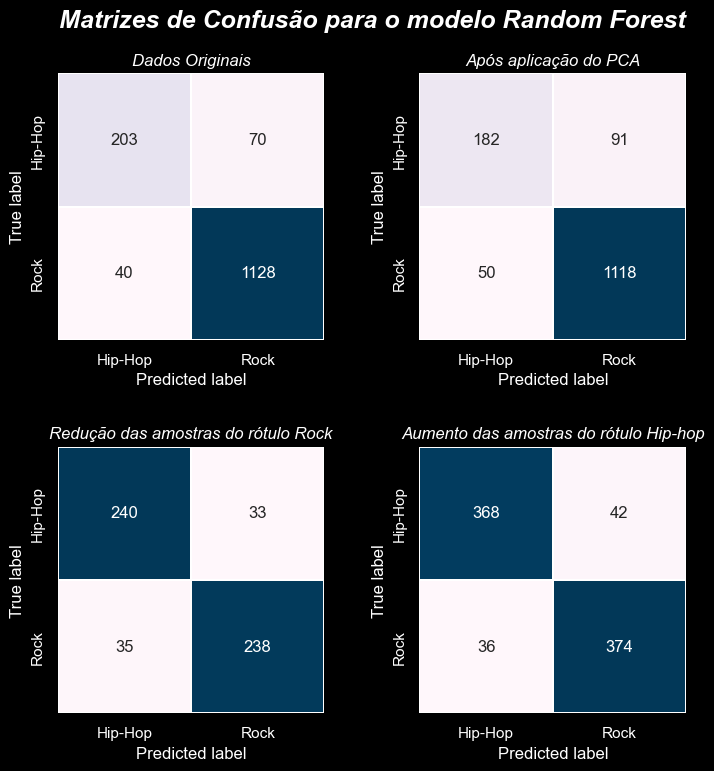

In [79]:
fig = plt.figure(figsize=(8,8))
fig.suptitle('Matrizes de Confusão para o modelo Random Forest', fontsize=18, fontweight='bold', style='italic')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)

plt.subplot(2, 2, 1)
plt.title('Dados Originais', style='italic')
sns.heatmap(confusion_matrix(y_test, rf[0]), square=True, annot=True, fmt='d', cbar=False, linewidths=0.3, cmap='PuBu', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.subplot(2, 2, 2)
plt.title('Após aplicação do PCA', style='italic')
sns.heatmap(confusion_matrix(y_test, rf[1]), square=True, annot=True, fmt='d', cbar=False, linewidths=0.3, cmap='PuBu', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.subplot(2, 2, 3)
plt.title('Redução das amostras do rótulo Rock', style='italic')
sns.heatmap(confusion_matrix(y_test_bal, rf[2]), square=True, annot=True, fmt='d', cbar=False, linewidths=0.3, cmap='PuBu', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.subplot(2, 2, 4)
plt.title('Aumento das amostras do rótulo Hip-hop', style='italic')
sns.heatmap(confusion_matrix(y_test_new, rf[3]), square=True, annot=True, fmt='d', cbar=False, linewidths=0.3, cmap='PuBu', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

## Comparativo dos Boxplots
### Essa etapa da análise plota todas as métricas e desempenho na forma de boxplots agrupadas para os quatro cenários, a fim de ser possível comparar a performance dos modelos para todos os cenários testados.

In [80]:
tests_box = [test_box for test_box in RESULTS_ALL.keys()]
indx = [i+1 for i in range(len(names))]

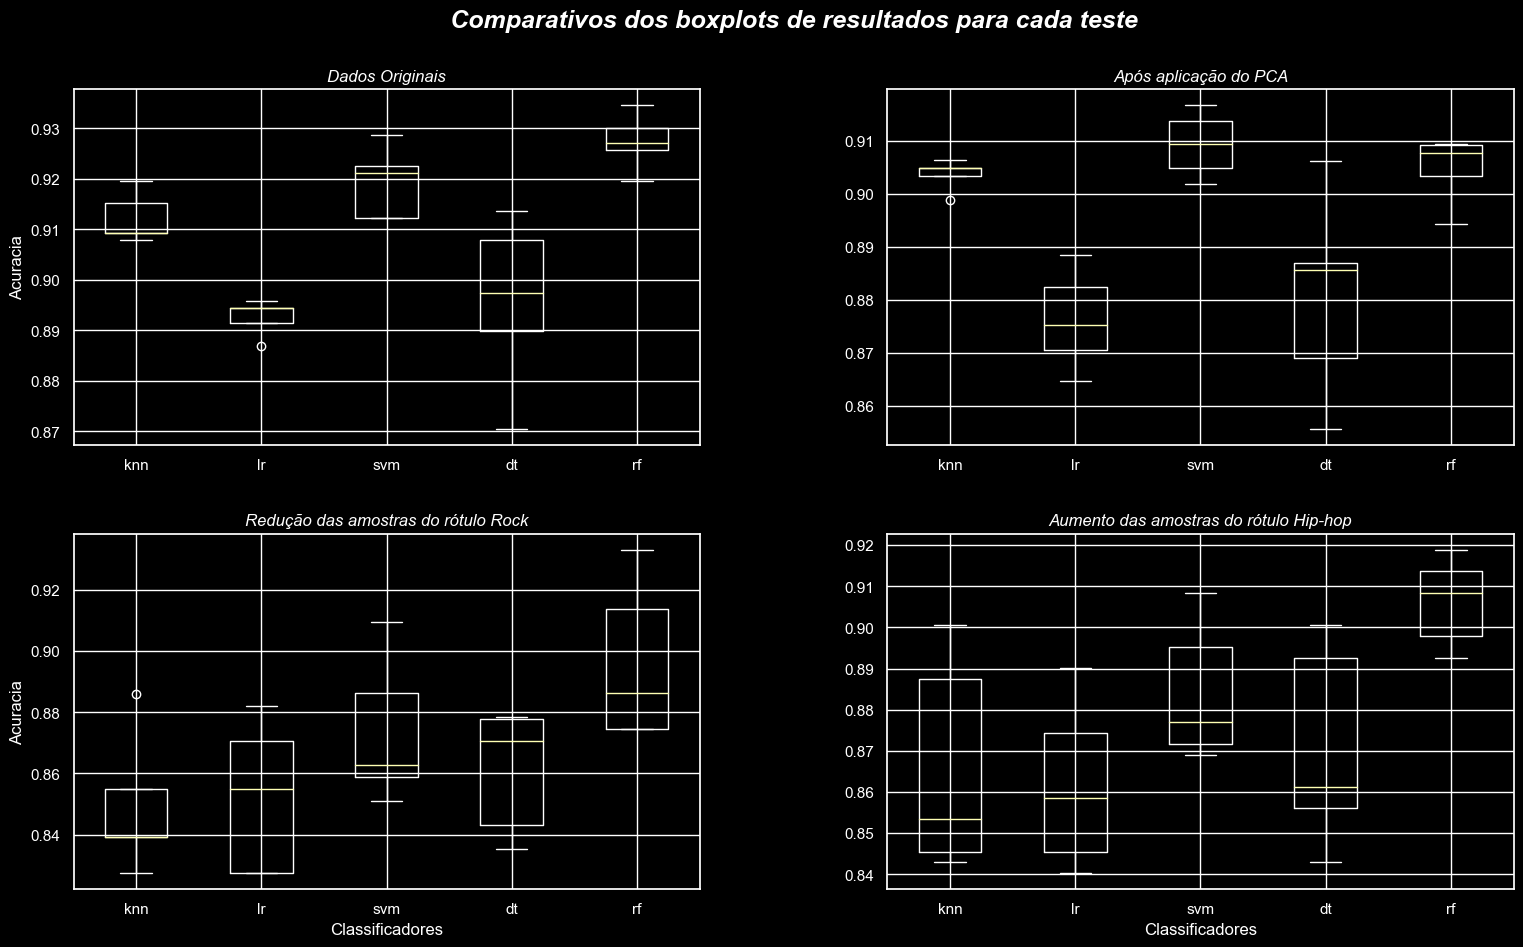

In [81]:
fig, ax = plt.subplots(figsize=(18,10))
fig.suptitle('Comparativos dos boxplots de resultados para cada teste', fontsize=18, fontweight='bold', style='italic')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.25)

plt.subplot(2, 2, 1)
plt.title('Dados Originais', style='italic')
plt.boxplot(RESULTS_ALL['original'])
plt.xticks(indx, names)
plt.ylabel('Acuracia')

plt.subplot(2, 2, 2)
plt.title('Após aplicação do PCA', style='italic')
plt.boxplot(RESULTS_ALL['pca'])
plt.xticks(indx, names)

plt.subplot(2, 2, 3)
plt.title('Redução das amostras do rótulo Rock', style='italic')
plt.boxplot(RESULTS_ALL['red_rock'])
plt.xticks(indx, names)
plt.xlabel('Classificadores')
plt.ylabel('Acuracia')

plt.subplot(2, 2, 4)
plt.title('Aumento das amostras do rótulo Hip-hop', style='italic')
plt.boxplot(RESULTS_ALL['aum_hiphop'])
plt.xticks(indx, names)
plt.xlabel('Classificadores')

plt.show()

# Conclusão 

## Após a análise dos algoritmos nos cenários criados, conclui-se que o modelo Random Forest foi o que obteve o melhor desempenho entre os modelos testados para os quatro cenários, seguido pelo SVM. Entretanto, o tempo de treinamento do SVM é muito maior que o Random Forest, o que justifica o uso deste último.

## Quanto aos cenários testados, o melhor resultado foi aquele com a utilização das amostras aumentadas para o atributo 'Hip-Hop'. Apesar da acurácia ter-se reduzido ligeiramente para o Random Forest, a precisão e a revocação se elevaram para um índice superior a 90%. Vale lembrar que a forma de geração dos novos dados se baseou apenas na geração de valores aleatórios apoiados em algumas análises estatísticas, de forma a se perder a menor quantidade possível de informação, apesar dela ainda existir. Não foi considerada nenhuma outra forma de otimização destes dados neste estudo. Para uma análise futura, será tentada a geração dos dados baseado em métricas mais próximas aos dados reais, como por exemplo a correlação entre os atributos, que não foi considerada neste estudo.

## Para estes estudo foi-se fixado um aumento de 50% nos dados menos ausentes (rótulo Hip-Hop) em conjunto com a redução das instâncias 'Rock' até a mesma quantidade. Esse valor foi escolhido arbitrariamente. Criar poucas instâncias para a classe 'Hip-Hop' pode não ter impacto relevante, ao passo que criar muitas amostras pode corromper as informações das features. Diversos outros cenários podem ser analisados para esta simulação através da escolha da quantidade de amostras dos dois atributos.

## Por fim, para fins de reproducibilidade, este estudo foi realizado com a semente de geração de variáveis randômicas (Random state) fixado em 42. Caso este valor seja alterado, os resultados podem variar.